<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/simulation_1403_08_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import cm



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
root_path_data = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Generated.csv'

In [36]:
main_df = pd.read_csv(root_path_data)

In [37]:
main_df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [38]:
main_df =

SyntaxError: invalid syntax (<ipython-input-38-6841320d17e1>, line 1)

In [39]:
main_df.value_counts('class')

,count
class,
0.0,58800
1.0,58800
2.0,58800
3.0,58800


In [40]:
main_df.value_counts('alpha')

,count
alpha,
0.098,2400
0.001,2400
0.083,2400
0.084,2400
0.085,2400
...,...
0.006,2400
0.007,2400
0.008,2400


In [41]:
main_df['bias'].mean()

1.7812740368978897

In [42]:
main_df['bias'].std()

0.2687365761657413

<ipython-input-43-bc6322159fa4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( main_df['betha_4'] , label=f'betha_1'  , shade=True  )


<Axes: xlabel='betha_4', ylabel='Density'>

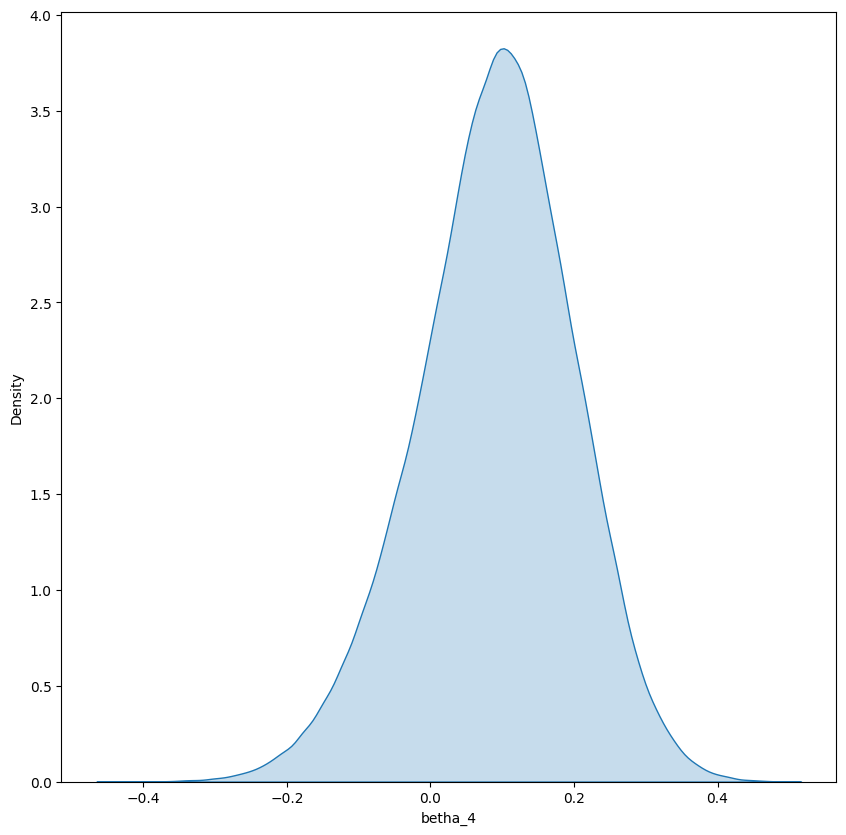

In [43]:
fig = plt.figure(figsize = (10 , 10 ))
sns.kdeplot( main_df['betha_4'] , label=f'betha_1'  , shade=True  )

In [44]:
main_df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [45]:
main_df_2 = main_df[main_df['R2'] > 0.95 ]

In [46]:
main_df_2

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,R2,locate,class,alpha,flap,Error
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.988046,5,0.0,0.001,1.0,0.163911
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.983762,5,0.0,0.001,1.0,-0.797636
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.957171,5,0.0,0.001,1.0,1.625647
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.977285,5,0.0,0.001,1.0,-0.528417
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.987228,5,0.0,0.001,1.0,0.469350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,0.975531,14,3.0,0.098,4.0,-0.325213
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,0.987969,14,3.0,0.098,4.0,0.704909
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,0.976083,14,3.0,0.098,4.0,0.790295
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,0.985952,14,3.0,0.098,4.0,-0.756543


In [47]:
df  = main_df_2.drop(['R2' , 'locate' , 'alpha' , 'flap' , 'Error'  ] , axis = 1 )

In [49]:
df

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,class
0,2.085390,0.0,-0.915657,-0.028551,2.888235,0.109142,0.039640,0.0
1,2.126398,0.0,-0.780628,-0.212653,2.751687,0.065987,-0.170549,0.0
2,2.073085,0.0,-0.813185,-0.045099,2.720254,0.020252,-0.038350,0.0
3,2.068925,0.0,-0.991820,-0.293427,3.077497,0.350788,-0.068416,0.0
4,2.083132,0.0,-0.846536,-0.178068,2.782345,0.062920,-0.131796,0.0
...,...,...,...,...,...,...,...,...
235195,1.503118,0.0,-1.483946,-0.226701,3.117215,0.138249,-0.136664,3.0
235196,1.476462,0.0,-1.088443,-0.021242,2.653989,0.115893,0.075977,3.0
235197,1.455194,0.0,-1.130570,-0.283127,2.737953,0.219741,-0.112765,3.0
235198,1.504200,0.0,-1.113942,-0.078336,2.691946,0.148071,0.005015,3.0


In [50]:
class0 = df[df['class'] == 0.0 ]
class1 = df[df['class'] == 1.0 ]
class2 = df[df['class'] == 2.0 ]
class3 = df[df['class'] == 3.0 ]

In [51]:
columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

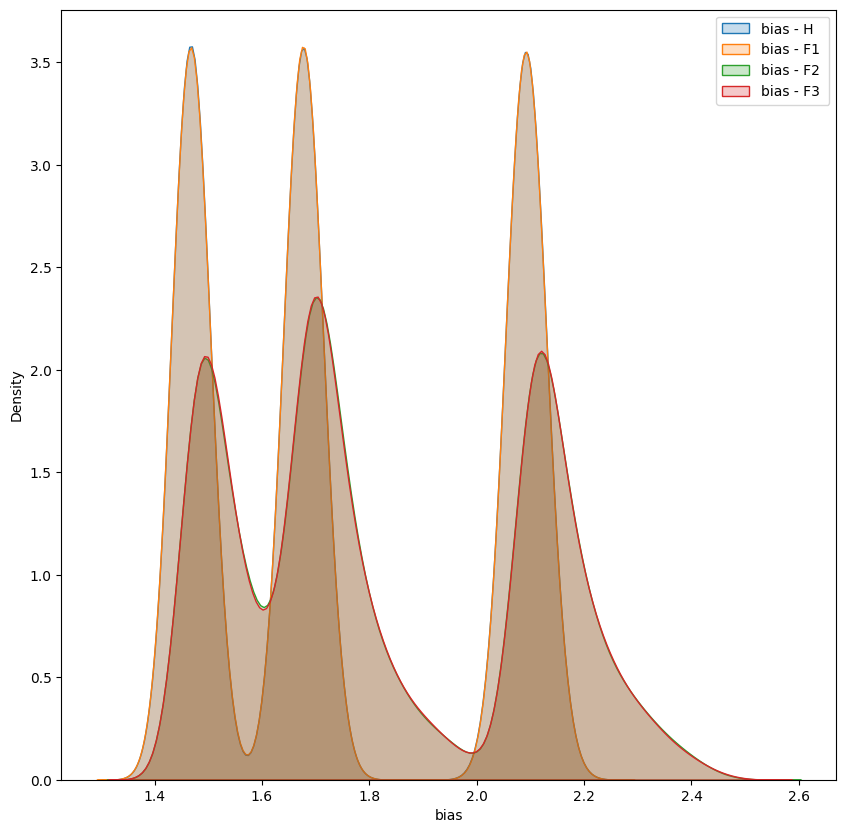

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:

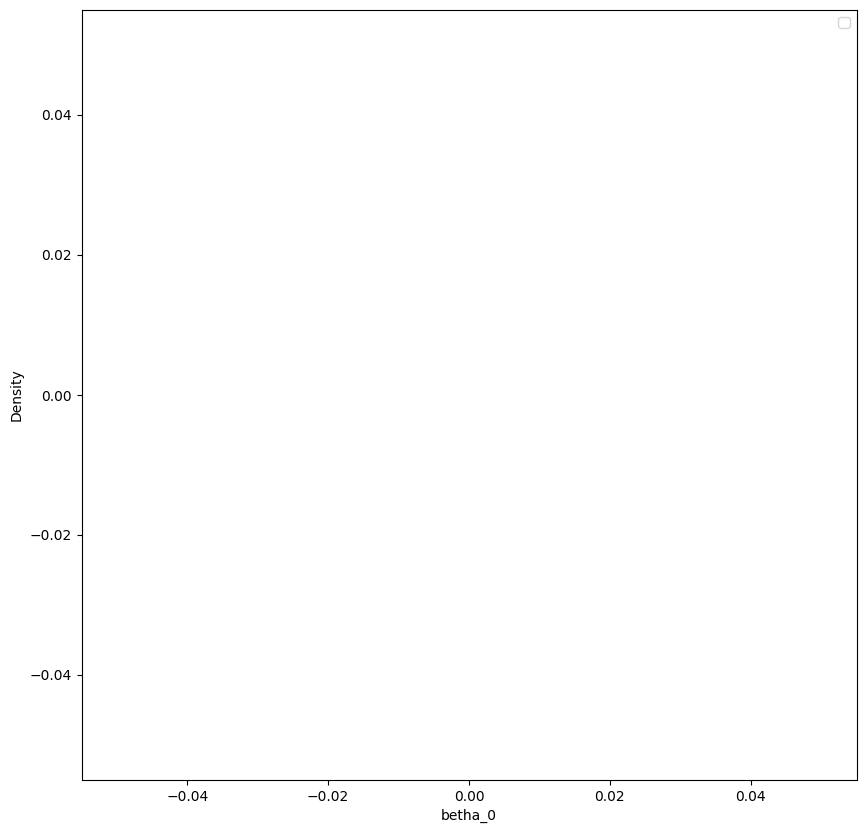

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

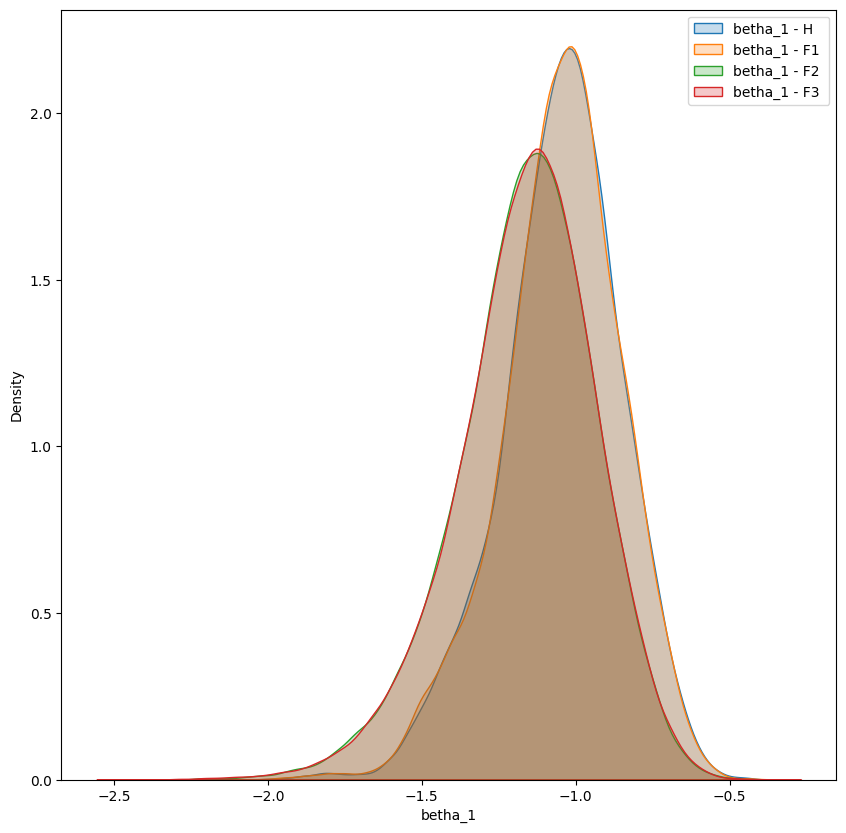

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

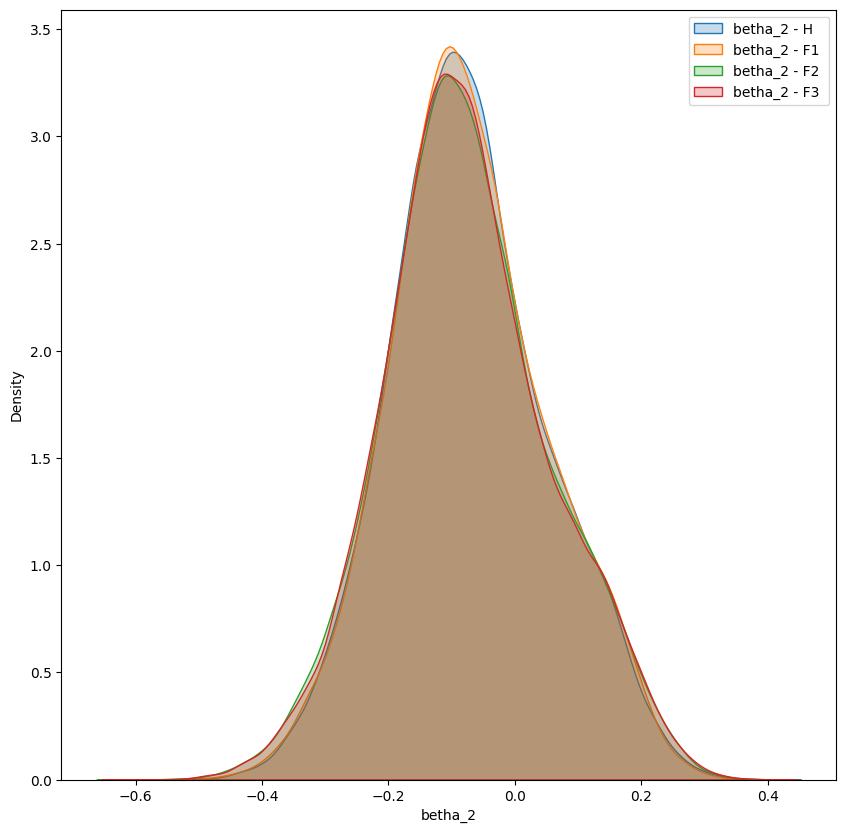

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

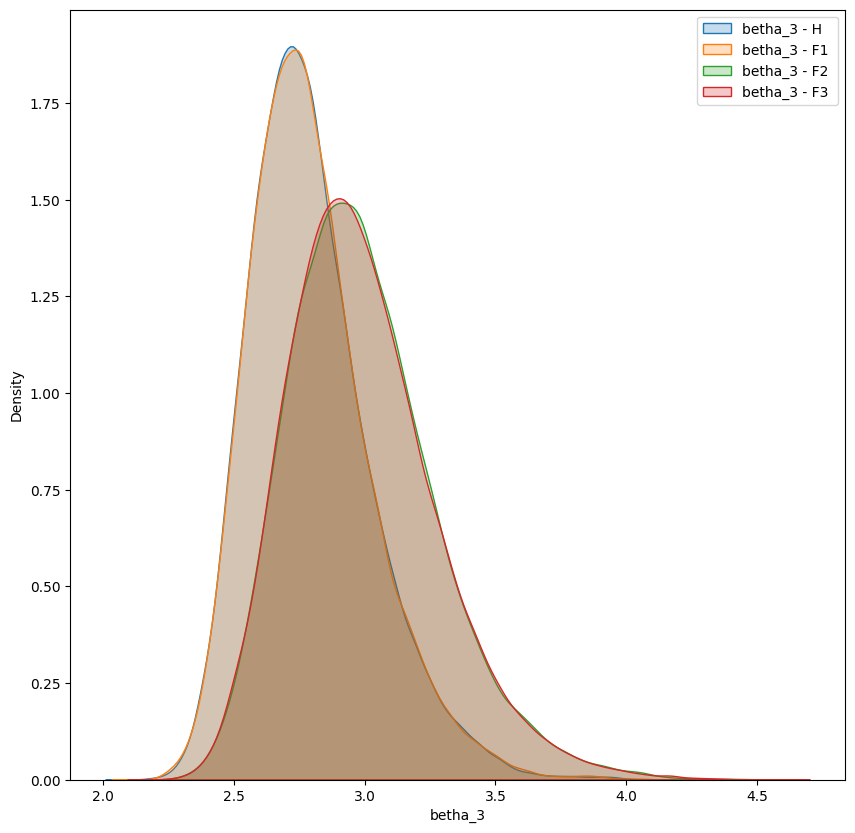

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

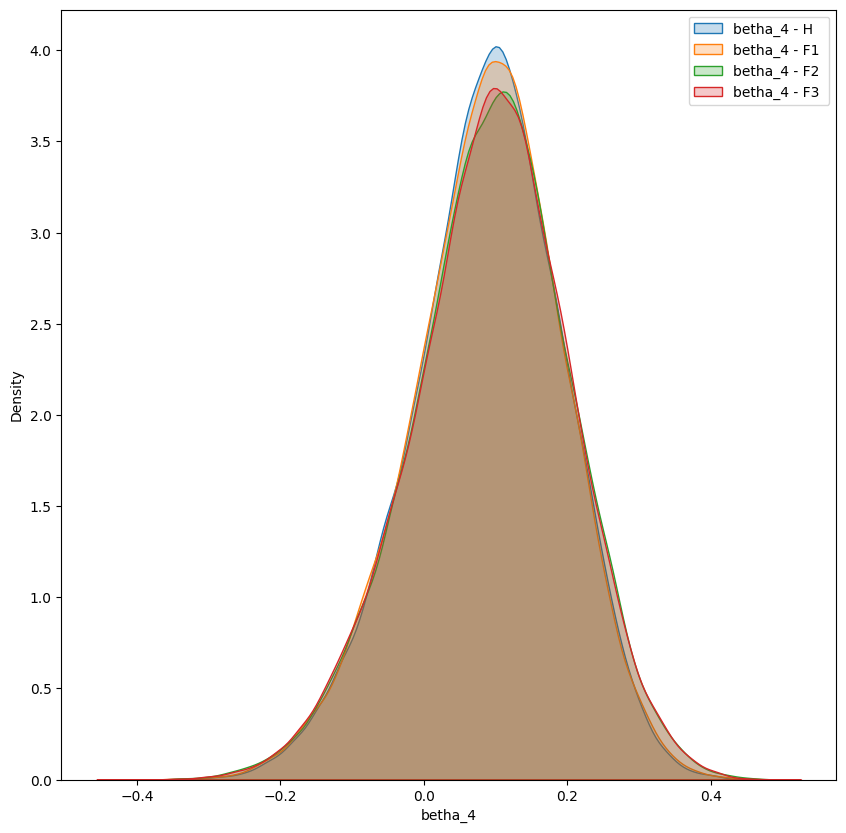

<ipython-input-32-83e4b2136fd7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
<ipython-input-32-83e4b2136fd7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
<ipython-input-32-83e4b2136fd7>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
<ipython-input-32-83e4b2136fd7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class3[f'

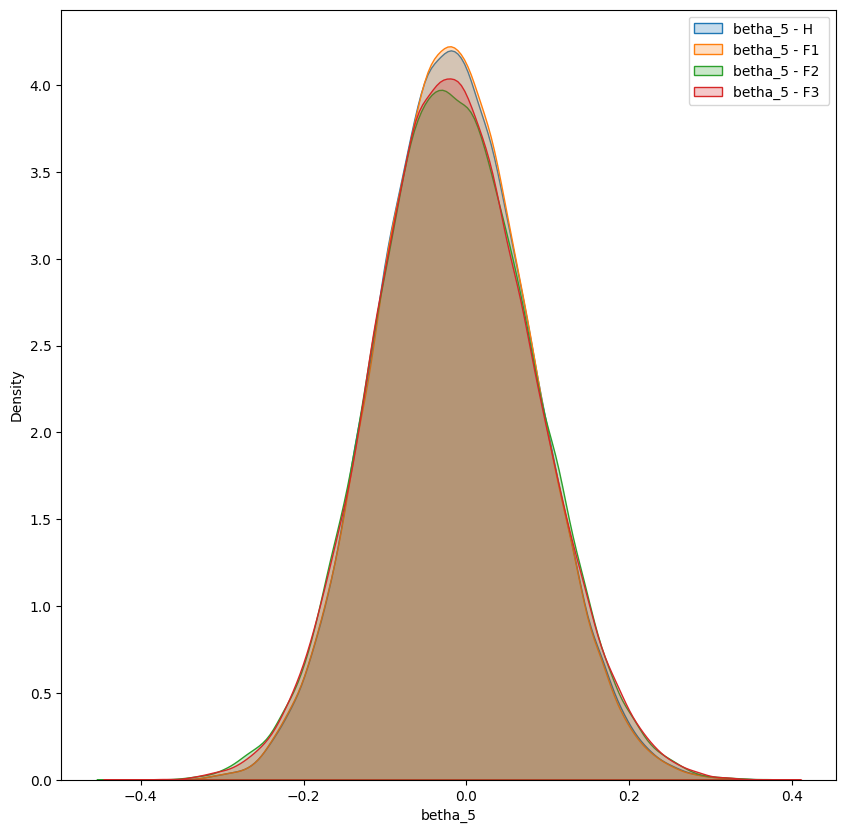

In [32]:
for col in columns :
  plt.figure(figsize = (10 , 10 ) )
  sns.kdeplot(class0[f'{col}'] , label=f'{col} - H' , shade = True  )
  sns.kdeplot(class1[f'{col}'] , label=f'{col} - F1' , shade = True   )
  sns.kdeplot(class2[f'{col}'] , label=f'{col} - F2' , shade = True  )
  sns.kdeplot(class3[f'{col}'] , label=f'{col} - F3 ' , shade = True   )
  plt.legend()
  plt.show()



In [52]:

df_sample = df.sample(200000)

In [53]:
df_sample

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5,class
166863,1.868803,0.0,-1.267002,-0.014289,3.160205,0.058053,0.021999,2.0
150537,1.706678,0.0,-1.029104,-0.090789,2.742328,0.117644,-0.040724,2.0
220808,2.258810,0.0,-0.750860,-0.041720,2.864743,0.066770,0.028665,3.0
133964,2.198105,0.0,-0.926561,-0.117236,3.029423,0.152784,-0.012929,2.0
166845,2.108083,0.0,-1.162897,-0.027426,3.179170,0.087605,0.029955,2.0
...,...,...,...,...,...,...,...,...
186849,1.669656,0.0,-0.747780,-0.111156,2.489299,0.236589,0.047406,3.0
178281,1.687839,0.0,-0.960270,-0.105269,2.697856,0.198940,0.013640,3.0
216202,1.901714,0.0,-1.055681,-0.097569,2.998039,0.133446,-0.031341,3.0
131167,1.730740,0.0,-1.229614,0.226432,2.918446,-0.079799,0.181986,2.0


In [54]:
X , Y = df_sample.drop(['class'] , axis = 1 ) , df_sample['class']

In [55]:
X

,bias,betha_0,betha_1,betha_2,betha_3,betha_4,betha_5
166863,1.868803,0.0,-1.267002,-0.014289,3.160205,0.058053,0.021999
150537,1.706678,0.0,-1.029104,-0.090789,2.742328,0.117644,-0.040724
220808,2.258810,0.0,-0.750860,-0.041720,2.864743,0.066770,0.028665
133964,2.198105,0.0,-0.926561,-0.117236,3.029423,0.152784,-0.012929
166845,2.108083,0.0,-1.162897,-0.027426,3.179170,0.087605,0.029955
...,...,...,...,...,...,...,...
186849,1.669656,0.0,-0.747780,-0.111156,2.489299,0.236589,0.047406
178281,1.687839,0.0,-0.960270,-0.105269,2.697856,0.198940,0.013640
216202,1.901714,0.0,-1.055681,-0.097569,2.998039,0.133446,-0.031341
131167,1.730740,0.0,-1.229614,0.226432,2.918446,-0.079799,0.181986


In [56]:
Y

,class
166863,2.0
150537,2.0
220808,3.0
133964,2.0
166845,2.0
...,...
186849,3.0
178281,3.0
216202,3.0
131167,2.0


In [57]:
x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(X , Y , test_size = 0.3 , random_state=42 )

In [22]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}

In [58]:
stander = StandardScaler()
x_u_train = pd.DataFrame(stander.fit_transform(x_u_train) , columns = x_u_train.columns )
x_u_test  = pd.DataFrame(stander.transform(x_u_test) , columns = x_u_test.columns )

In [ ]:
obj_gaunb = GaussianNB()
obj_gaunb.fit(x_u_train , y_u_train )
pre_nb = obj_gaunb.predict(x_u_test)
accuray_nav = accuracy_score(pre_nb ,y_u_test )
print(classification_report(pre_nb ,y_u_test ) )
# plt.figure(figsize = (5 ,5 ))
# cm = confusion_matrix(pre_nb ,y_u_test , normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Nave Bays Confusion Matrix ")
# plt.show()
print(f"accuracy Nave Bays : {accuray_nav}")
total_simulation['accuracy_nav'].append(accuray_nav)

              precision    recall  f1-score   support

         0.0       0.64      0.31      0.42     31062
         1.0       0.13      0.32      0.18      5915
         2.0       0.43      0.34      0.38     18625
         3.0       0.10      0.33      0.15      4398

    accuracy                           0.32     60000
   macro avg       0.32      0.33      0.28     60000
weighted avg       0.48      0.32      0.36     60000

accuracy Nave Bays : 0.32158333333333333


In [ ]:
# ---------------------------------------------------------
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                      cv = 3, n_jobs = -1, verbose = 2)
CV_rfc.fit(x_u_train, y_u_train)
best_params_for_random_forest = CV_rfc.best_params_
pre_random = CV_rfc.predict(x_u_test)
accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
print(classification_report(pre_nb ,y_u_test ) )
# plt.figure(figsize = (5 , 5 ))
# cm = confusion_matrix(pre_random ,y_u_test , normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("Random Forest Confusion Matrix ")
# plt.show()
print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

              precision    recall  f1-score   support

         0.0       0.64      0.31      0.42     31062
         1.0       0.13      0.32      0.18      5915
         2.0       0.43      0.34      0.38     18625
         3.0       0.10      0.33      0.15      4398

    accuracy                           0.32     60000
   macro avg       0.32      0.33      0.28     60000
weighted avg       0.48      0.32      0.36     60000

accuracy accuracy_random_forest  : 0.46005


In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(x_u_train, y_u_train)
best_params_for_svc = grid.best_params_
model_svc = SVC()
svc_predict = grid.predict(x_u_test)
accuracy_svc = accuracy_score(svc_predict ,y_u_test )
# plt.figure(figsize = (5 , 5 ))
# cm = confusion_matrix(svc_predict ,y_u_test, normalize='pred')
# disp = ConfusionMatrixDisplay(confusion_matrix=cm )
# disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# plt.title("SVM(SVC) Confusion Matrix ")
# plt.show()
total_simulation['accuracy_svc_'].append(accuracy_svc)
total_simulation['C_svc'].append(best_params_for_svc['C'])
total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.4min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.4min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.4min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.3min
[CV] END ........................C=1, gamma=1, kernel=linear; total time= 8.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.4min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.3min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.4min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.6min
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time= 9.7min
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time= 8.5min
[CV] END ......................C=1, gamma=0.1, 

In [59]:
new_y_u_train_cat = to_categorical(y_u_train , 4 )
new_y_u_test_cat  = to_categorical(y_u_test , 4 )

Epoch 1/50
1400/1400 [==============================] - 8s 5ms/step - loss: 1.0173 - acc: 0.5122 - val_loss: 0.9059 - val_acc: 0.5544
Epoch 2/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.9297 - acc: 0.5488 - val_loss: 0.8921 - val_acc: 0.5618
Epoch 3/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.9178 - acc: 0.5549 - val_loss: 0.8865 - val_acc: 0.5635
Epoch 4/50
1400/1400 [==============================] - 6s 5ms/step - loss: 0.9084 - acc: 0.5584 - val_loss: 0.8761 - val_acc: 0.5703
Epoch 5/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.8982 - acc: 0.5629 - val_loss: 0.8632 - val_acc: 0.5764
Epoch 6/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.8878 - acc: 0.5660 - val_loss: 0.8531 - val_acc: 0.5795
Epoch 7/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.8805 - acc: 0.5683 - val_loss: 0.8581 - val_acc: 0.5791
Epoch 8/50
1400/1400 [==============================] - 6s 4ms

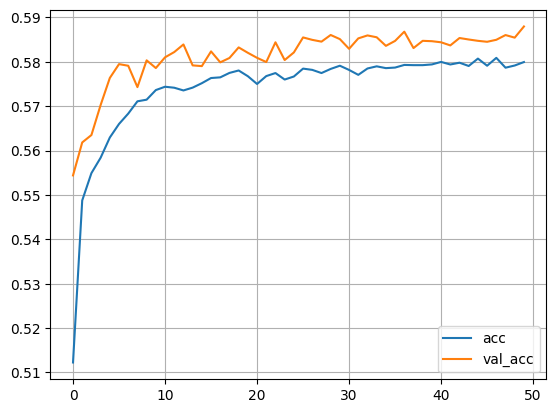

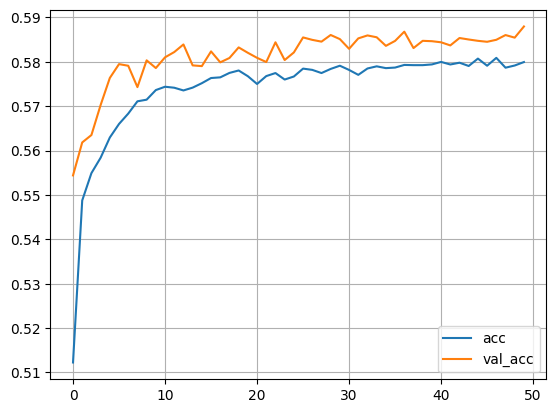

In [61]:

model_learning = Sequential([
    Dense(256 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
    BatchNormalization() ,
    Dropout(0.2) ,
    Dense(128 , activation= 'relu' ) ,
    BatchNormalization() ,
    Dropout(0.2) ,
    Dense(56 , activation= 'relu' ) ,
    BatchNormalization() ,
    Dense(32 , activation= 'relu' ) ,
    Dropout(0.2) ,
    Dense(10 , activation= 'relu' ) ,
    Dense(4 , activation='softmax' ) ,
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model_learning.compile(optimizer=opt , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , batch_size=100 , validation_data = [x_u_test , new_y_u_test_cat ] )
plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
plt.legend()
plt.grid()
plt.show()

In [ ]:






# ---------------------------------------------------------
extra_classifier = ExtraTreesClassifier()
extra_classifier.fit(x_u_train , y_u_train )
predict_extra = extra_classifier.predict(x_u_test)
total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

# --------------------------------------------------------



# ----------------------------------------------------------












              precision    recall  f1-score   support

         0.0       0.38      0.29      0.33     19891
         1.0       0.36      0.32      0.34     17100
         2.0       0.42      0.33      0.37     18856
         3.0       0.11      0.39      0.17      4153

    accuracy                           0.32     60000
   macro avg       0.32      0.33      0.30     60000
weighted avg       0.37      0.32      0.33     60000

accuracy Nave Bays : 0.3153666666666667
Fitting 3 folds for each of 60 candidates, totalling 180 fits


KeyboardInterrupt: 